<a href="https://colab.research.google.com/github/BillDhawal/Algorithm_Assignments_NITK/blob/master/pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import numpy as np

In [6]:
# python list
list = [1,2,3,4]
list


[1, 2, 3, 4]

In [12]:
np1 = np.random.rand(3,4)
np1

array([[0.74557832, 0.36406548, 0.2164865 , 0.74042542],
       [0.67850563, 0.75689132, 0.7179738 , 0.80755867],
       [0.81006948, 0.19896117, 0.07173749, 0.76296979]])

In [11]:
tensor_2d = torch.rand(3,4)
tensor_2d

tensor([[0.1597, 0.0190, 0.9117, 0.1012],
        [0.7614, 0.3369, 0.9878, 0.3641],
        [0.7961, 0.8715, 0.9060, 0.4762]])

In [14]:
tensor_3d = torch.rand(2,3,4)
tensor_3d

tensor([[[0.8211, 0.0344, 0.1644, 0.5881],
         [0.7501, 0.6962, 0.8174, 0.3721],
         [0.3728, 0.6191, 0.5754, 0.4150]],

        [[0.3949, 0.9266, 0.8934, 0.1200],
         [0.9145, 0.1348, 0.8319, 0.1620],
         [0.1656, 0.0983, 0.7508, 0.9955]]])

TENSOR OPERATIONS

In [16]:
my_torch = torch.arange(10)
my_torch

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
my_torch = my_torch.reshape(2,5)
my_torch

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [23]:
# Reshape when we dont know the numb of Items.
my_torch2 = torch.arange(15)
my_torch2 = my_torch2.reshape(-1,3)
my_torch2


tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14]])

In [32]:
my_torch3 = torch.arange(15)
my_torch3 = my_torch3.view(3,5)
my_torch3

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14]])

In [36]:
# First row index 0
my_torch3[0,:]

tensor([0, 1, 2, 3, 4])

In [37]:
# First column index 0
my_torch3[:,0]

tensor([ 0,  5, 10])

In [42]:
# First 2*2 matrix
my_torch3[:2,:2]

tensor([[0, 1],
        [5, 6]])

TENSOR MATH OPERATION

In [44]:
tensor1 = torch.tensor([1,2,3])
tensor2 = torch.tensor([4,5,6])

In [45]:
tensor1 + tensor2

tensor([5, 7, 9])

In [46]:
torch.add(tensor1,tensor2)

tensor([5, 7, 9])

In [47]:
tensor1 - tensor2


tensor([-3, -3, -3])

In [49]:
torch.pow(tensor1,tensor2)

tensor([  1,  32, 729])

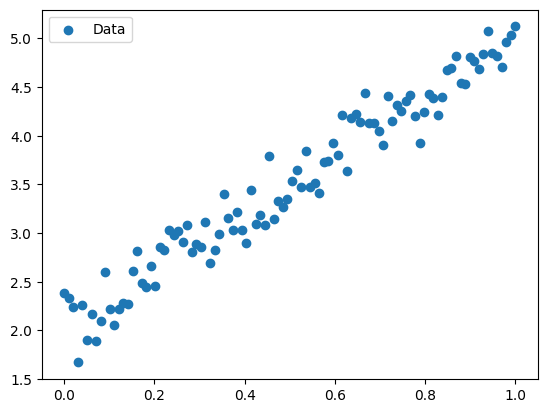

Epoch 100/1000, Loss: 0.0444
Epoch 200/1000, Loss: 0.0389
Epoch 300/1000, Loss: 0.0385
Epoch 400/1000, Loss: 0.0385
Epoch 500/1000, Loss: 0.0385
Epoch 600/1000, Loss: 0.0385
Epoch 700/1000, Loss: 0.0385
Epoch 800/1000, Loss: 0.0385
Epoch 900/1000, Loss: 0.0385
Epoch 1000/1000, Loss: 0.0385


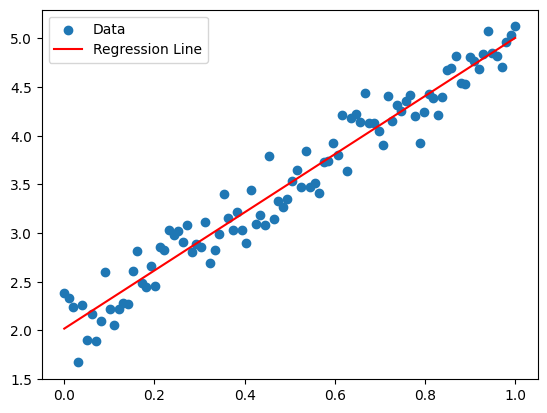

Weights: 2.9882001876831055, Bias: 2.0178534984588623
Input: 0.00, Prediction: 2.02
Input: 0.22, Prediction: 2.68
Input: 0.44, Prediction: 3.35
Input: 0.67, Prediction: 4.01
Input: 0.89, Prediction: 4.67
Input: 1.11, Prediction: 5.34
Input: 1.33, Prediction: 6.00
Input: 1.56, Prediction: 6.67
Input: 1.78, Prediction: 7.33
Input: 2.00, Prediction: 7.99


<ipython-input-53-97c800c9948e>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("linear_regression.pth"))


In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Generate synthetic data: y = 3x + 2 + noise
X = torch.linspace(0, 1, 100).unsqueeze(1)  # Shape: (100, 1)
y = 3 * X + 2 + 0.2 * torch.randn(X.size())  # Shape: (100, 1)

# Visualize the data
plt.scatter(X.numpy(), y.numpy(), label="Data")
plt.legend()
plt.show()

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # Input feature: 1, Output feature: 1

    def forward(self, x):
        return self.linear(x)

# Initialize the model
model = LinearRegressionModel()

# Define the loss function (Mean Squared Error)
criterion = nn.MSELoss()

# Define the optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Number of epochs
epochs = 1000

# Training loop
for epoch in range(epochs):
    # Forward pass
    predictions = model(X)
    loss = criterion(predictions, y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

torch.save(model.state_dict(), "linear_regression.pth")

# Plot the data and the regression line
predicted = model(X).detach()  # Detach to avoid computing gradients
plt.scatter(X.numpy(), y.numpy(), label="Data")
plt.plot(X.numpy(), predicted.numpy(), color='red', label="Regression Line")
plt.legend()
plt.show()

# Print learned parameters
print(f"Weights: {model.linear.weight.item()}, Bias: {model.linear.bias.item()}")



# Re-initialize the model
model = LinearRegressionModel()
model.load_state_dict(torch.load("linear_regression.pth"))
model.eval()  # Set the model to evaluation mode

new_X = torch.linspace(0, 2, 10).unsqueeze(1)  # Shape: (10, 1)

with torch.no_grad():  # Disable gradient computation
    predictions = model(new_X)  # Forward pass through the model

# Print input and corresponding predictions
for x, pred in zip(new_X, predictions):
    print(f"Input: {x.item():.2f}, Prediction: {pred.item():.2f}")

AttributeError: 'LinearRegressionModel' object has no attribute 'predict'

Simple NEURAL NETWORK

In [72]:
import torch.nn as nn
import torch.nn.functional as F

# Create model class that inherit nn.Module
# we are going to classify iris flower type
class Model(nn.Module):
  def __init__(self, in_features = 4 , h1 = 8, h2=9, out_features = 3) -> None:
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x ):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x


In [73]:
torch.manual_seed(41)
# Create an instance of Model
model = Model()


In [57]:
import pandas as pd

url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [59]:
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)

my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [61]:
# Train Split Test
X = my_df.drop('species',axis=1)
y = my_df['species']

X = X.values
y = y.values

In [64]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [66]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)



In [76]:
 # Set Criteria for model to measure the error
 criterion = nn.CrossEntropyLoss()
 # Choose Optimizer, LR
 optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

for name, param in model.named_parameters():
    print(f"Name: {name}")
    print(f"Value: {param.data}")
    print(f"Shape: {param.shape}")
    print()

Name: fc1.weight
Value: tensor([[-0.2636, -0.2734,  0.3005, -0.3308],
        [-0.2350,  0.2720, -0.3718,  0.2452],
        [ 0.3045,  0.1357,  0.0896,  0.1933],
        [ 0.3782,  0.0407, -0.3600,  0.4613],
        [ 0.3666, -0.0116, -0.2923, -0.1937],
        [-0.4415,  0.3314, -0.0434,  0.3445],
        [ 0.1883, -0.0992, -0.3197,  0.1740],
        [-0.3208, -0.1111,  0.2972, -0.2723]])
Shape: torch.Size([8, 4])

Name: fc1.bias
Value: tensor([-0.0245, -0.0679,  0.0573,  0.4814,  0.2923, -0.1877,  0.4425, -0.1626])
Shape: torch.Size([8])

Name: fc2.weight
Value: tensor([[ 0.1456,  0.1463, -0.0107, -0.3290,  0.3324, -0.0817,  0.2408, -0.2121],
        [-0.0361,  0.3031, -0.3068,  0.0136, -0.0046, -0.3022, -0.0685, -0.3241],
        [ 0.0764,  0.0595,  0.2023,  0.0088, -0.1424, -0.1275, -0.1320,  0.2750],
        [ 0.1133, -0.3520,  0.0632, -0.0472,  0.2579, -0.1034,  0.3086,  0.1093],
        [-0.3185,  0.0744, -0.0807,  0.1770, -0.3035, -0.0259,  0.2337,  0.1253],
        [ 0.1664,  

In [78]:
epoch = 50
losses = []
for i in range(epoch):
  # GO forward and get prediction
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i % 10 == 0:
    print(f"Epoch: {i} Loss: {loss}")
  # GO backward and update weights
  loss.backward()
  optimizer.step()


Epoch: 0 Loss: 0.3275812268257141
Epoch: 10 Loss: 1.5321393013000488
Epoch: 20 Loss: 1.9443976879119873
Epoch: 30 Loss: 1.924430251121521
Epoch: 40 Loss: 1.5066365003585815


Text(0.5, 0, 'Epoch')

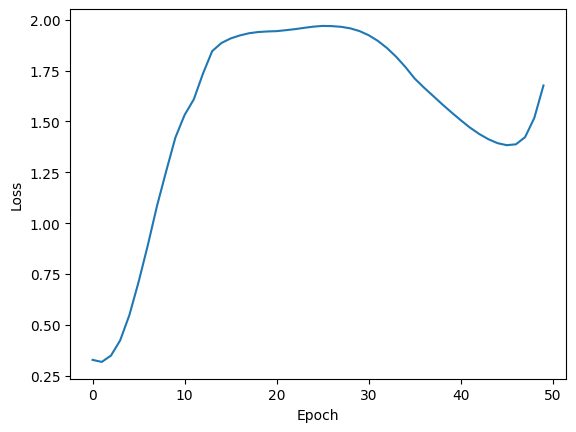

In [79]:
plt.plot(range(epoch),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [80]:
# Evaluate the model
with torch.no_grad():
  y_eval = model.forward(X_test)
  loss = criterion(y_eval,y_test)
print(f"Loss: {loss}")

Loss: 1.7835865020751953


In [83]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
print(f'{correct} out of {len(y_test)} = {100*correct/len(y_test)}% correct')

1.) tensor([ 1.1048,  1.3470, -1.3644]) 	 2
2.) tensor([ 1.1048,  1.3470, -1.3644]) 	 2
3.) tensor([ 1.1048,  1.3470, -1.3644]) 	 2
4.) tensor([ 1.1048,  1.3470, -1.3644]) 	 1
5.) tensor([ 1.1048,  1.3470, -1.3644]) 	 2
6.) tensor([ 1.1048,  1.3470, -1.3644]) 	 1
7.) tensor([ 1.1048,  1.3470, -1.3644]) 	 2
8.) tensor([ 1.1048,  1.3470, -1.3644]) 	 1
9.) tensor([ 1.1048,  1.3470, -1.3644]) 	 2
10.) tensor([ 1.1048,  1.3470, -1.3644]) 	 2
11.) tensor([ 1.1048,  1.3470, -1.3644]) 	 2
12.) tensor([ 16.7091,  18.0443, -18.1707]) 	 0
13.) tensor([ 14.9422,  16.1764, -16.2763]) 	 0
14.) tensor([ 1.1048,  1.3470, -1.3644]) 	 1
15.) tensor([ 13.8584,  15.0306, -15.1142]) 	 0
16.) tensor([ 1.1048,  1.3470, -1.3644]) 	 2
17.) tensor([ 14.6387,  15.8556, -15.9509]) 	 0
18.) tensor([ 1.1048,  1.3470, -1.3644]) 	 1
19.) tensor([ 15.8596,  17.1462, -17.2599]) 	 0
20.) tensor([ 12.4332,  13.5239, -13.5861]) 	 0
21.) tensor([ 1.1048,  1.3470, -1.3644]) 	 1
22.) tensor([ 1.1048,  1.3470, -1.3644]) 	 2
2